In [1]:
# import the libraries
import pandas as pd
import numpy as np

In [2]:
df_orders = pd.read_csv('orders_and_shipments.csv',encoding='ISO-8859-1')
df_inventory = pd.read_csv('inventory.csv')
df_fulfillment = pd.read_csv('fulfillment.csv')

In [5]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0    Order ID                    30871 non-null  int64 
 1    Order Item ID               30871 non-null  int64 
 2    Order YearMonth             30871 non-null  int64 
 3    Order Year                  30871 non-null  int64 
 4    Order Month                 30871 non-null  int64 
 5    Order Day                   30871 non-null  int64 
 6   Order Time                   30871 non-null  object
 7   Order Quantity               30871 non-null  int64 
 8   Product Department           30871 non-null  object
 9   Product Category             30871 non-null  object
 10  Product Name                 30871 non-null  object
 11   Customer ID                 30871 non-null  int64 
 12  Customer Market              30871 non-null  object
 13  Customer Region              30

In [6]:
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1    Year Month              4200 non-null   int64  
 2    Warehouse Inventory     4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB


In [7]:
df_fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product Name                          118 non-null    object 
 1    Warehouse Order Fulfillment (days)   118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [10]:

import pandas as pd
merged_df = pd.merge(df_orders, df_inventory, on='Product Name', how='inner')
merged_df = pd.merge(merged_df, df_fulfillment, on='Product Name', how='inner')


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110063 entries, 0 to 1110062
Data columns (total 28 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0    Order ID                             1110063 non-null  int64  
 1    Order Item ID                        1110063 non-null  int64  
 2    Order YearMonth                      1110063 non-null  int64  
 3    Order Year                           1110063 non-null  int64  
 4    Order Month                          1110063 non-null  int64  
 5    Order Day                            1110063 non-null  int64  
 6   Order Time                            1110063 non-null  object 
 7   Order Quantity                        1110063 non-null  int64  
 8   Product Department                    1110063 non-null  object 
 9   Product Category                      1110063 non-null  object 
 10  Product Name                          1110063 non-null

In [13]:

df = merged_df


In [14]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

There are no columns with missing value


In [15]:
if df.duplicated().any():
    print(f"There are as many as {supply_data.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


In [16]:
df.columns = df.columns.str.strip()

In [17]:
df['Discount %'].sample(30)

749427       -  
389204      0.13
264223      0.18
917826      0.07
1099846      -  
205430      0.07
1037117     0.13
124898       -  
865435      0.02
1018675     0.01
804674      0.06
869057      0.01
536985      0.03
1003176     0.05
8826        0.05
786224      0.09
450302      0.25
621064      0.01
811963      0.18
905021      0.18
266747       -  
674387      0.06
1071162     0.06
454787      0.01
715518      0.06
1054305     0.15
625553      0.06
570875      0.12
668699       -  
722908      0.03
Name: Discount %, dtype: object

In [18]:
# Convert the '-' values to 0 in the 'Discount %' column and then change the data type from object to float
df['Discount %'] = df['Discount %'].replace('  -  ', 0).astype(float)

In [19]:
# Make new columns: Order Datetime and Shipment Datetime
df['Order Datetime'] = pd.to_datetime(df['Order Year'].astype(str) + '-' + df['Order Month'].astype(str) + '-' + df['Order Day'].astype(str) + ' ' + df['Order Time'])
df['Shipment Datetime'] = pd.to_datetime(df['Shipment Year'].astype(str) + '-' + df['Shipment Month'].astype(str) + '-' + df['Shipment Day'].astype(str))

# Displaying the result
df[['Order Datetime', 'Shipment Datetime']].head()

,Order Datetime,Shipment Datetime
0,2015-02-21 14:07:00,2015-02-27
1,2015-02-21 14:07:00,2015-02-27
2,2015-02-21 14:07:00,2015-02-27
3,2015-02-21 14:07:00,2015-02-27
4,2015-02-21 14:07:00,2015-02-27


In [20]:
df.drop(columns=['Order Year', 'Order Month', 'Order Day', 'Order Time',
                        'Shipment Year', 'Shipment Month', 'Shipment Day'], inplace=True)

In [21]:
df['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican\xa0Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d\x92Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'Nigeria', 'Vietnam', 'Bolivia', 'El Salvador', 'Colombia',
       'Belgium', 'Portugal', 'New zealand', 'Egypt', 'Gabon', 'Ireland',
       'Ghana', 'Thailand', 'Russia', 'Malaysia', 'Austria', 'Belarus',
       'Mali', 'Switzerland', 'Kenya', 'Saudi Arabia', 'Jordania',
       'Ukraine', 'Norway', 'Algeria\xa0', 'Lithuania', 'Barbados',
       'Guyana', 'Myanm

In [22]:
df['Customer Country'] = df['Customer Country'].replace({
    'Dominican\xa0Republic': 'Dominican Republic',
    'Cote d\x92Ivoire': 'Cote d Ivoire', # Added a comma at the end of this line
    'Perú': 'Peru',
    'Algeria\xa0': 'Algeria',
    'Israel\xa0':'Israel',
    'Benín': 'Benin'
})
df['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'Nigeria', 'Vietnam', 'Bolivia', 'El Salvador', 'Colombia',
       'Belgium', 'Portugal', 'New zealand', 'Egypt', 'Gabon', 'Ireland',
       'Ghana', 'Thailand', 'Russia', 'Malaysia', 'Austria', 'Belarus',
       'Mali', 'Switzerland', 'Kenya', 'Saudi Arabia', 'Jordania',
       'Ukraine', 'Norway', 'Algeria', 'Lithuania', 'Barbados', 'Guyana',
       'Myanmar', 'Zamb

In [23]:
df['Order Processing Time'] = (df['Shipment Datetime'] - df['Order Datetime']).dt.days
df['Order Processing Time'] = df['Order Processing Time'].apply(lambda x: 0 if x == -1 else x)

df.sample(5)

,Order ID,Order Item ID,Order YearMonth,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,...,Gross Sales,Discount %,Profit,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Warehouse Order Fulfillment (days),Order Datetime,Shipment Datetime,Order Processing Time
544953,49288,123217,201604,5,Golf,Shop By Sport,Under Armour Girls' Toddler Spine Surge Runni,748,Pacific Asia,West Asia,...,200,0.03,97,201502,155,1.40097,6.3,2016-04-03 11:16:00,2016-04-07,3
1000470,41956,104733,201609,1,Apparel,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,9453,North America,Canada,...,130,0.16,65,201606,82,2.00835,7.0,2016-09-04 10:42:00,2016-09-06,1
830425,65858,164581,201708,3,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,8914,Europe,Southern Europe,...,180,0.18,147,201510,48,1.85482,8.3,2017-08-19 08:38:00,2017-08-23,3
182692,65396,163432,201708,1,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,3038,Europe,Western Europe,...,200,0.16,100,201508,105,1.92446,1.8,2017-08-12 14:46:00,2017-08-14,1
120687,55805,139556,201703,1,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,2889,LATAM,South America,...,200,0.02,100,201609,155,1.08205,1.8,2017-03-25 14:37:00,2017-03-31,5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110063 entries, 0 to 1110062
Data columns (total 24 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   Order ID                            1110063 non-null  int64         
 1   Order Item ID                       1110063 non-null  int64         
 2   Order YearMonth                     1110063 non-null  int64         
 3   Order Quantity                      1110063 non-null  int64         
 4   Product Department                  1110063 non-null  object        
 5   Product Category                    1110063 non-null  object        
 6   Product Name                        1110063 non-null  object        
 7   Customer ID                         1110063 non-null  int64         
 8   Customer Market                     1110063 non-null  object        
 9   Customer Region                     1110063 non-null  object        

In [25]:
#Total Cost of Inventory is a significant financial metric in supply chain management that calculates the overall cost associated with holding and managing inventory.
df['Storage_Cost'] = df['Inventory Cost Per Unit']*df['Warehouse Inventory']

In [27]:
#Profit Margin helps to assessing the profitability of the supply chain operations. It provides insights into the effectiveness of cost control and pricing strategies, enabling organizations to make adjustments to enhance overall profitability.
df['Profit_Margin'] = (df['Profit'] / df['Gross Sales']*100)

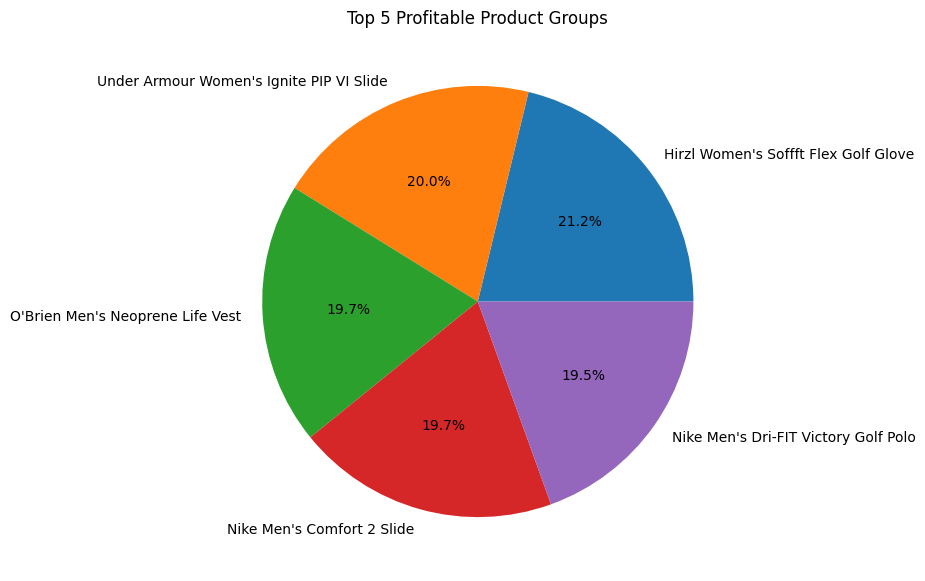

In [29]:
import matplotlib.pyplot as plt

# Calculate the top 5 profitable product groups
top_5_product_groups = df.groupby('Product Name')['Profit_Margin'].mean().sort_values(ascending=False).head(5)

# Extract product names and profit margins
product_names = top_5_product_groups.index.to_list()
profit_margins = top_5_product_groups.values.tolist()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(profit_margins, labels=product_names, autopct="%1.1f%%")
plt.title("Top 5 Profitable Product Groups")
plt.show()


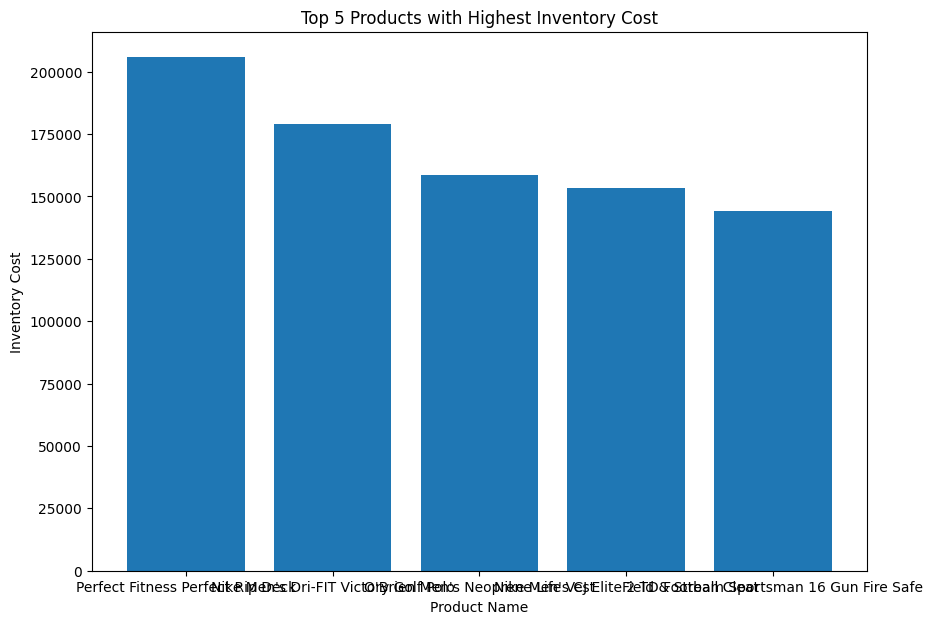

In [32]:

import matplotlib.pyplot as plt
# Calculate the top 5 products with highest inventory cost
top_5_products_inventory_cost = df.groupby('Product Name')['Inventory Cost Per Unit'].sum().sort_values(ascending=False).head(5)

# Extract product names and inventory cost
product_names = top_5_products_inventory_cost.index.to_list()
inventory_cost = top_5_products_inventory_cost.values.tolist()

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(product_names, inventory_cost)
plt.title("Top 5 Products with Highest Inventory Cost")
plt.xlabel("Product Name")
plt.ylabel("Inventory Cost")
plt.show()


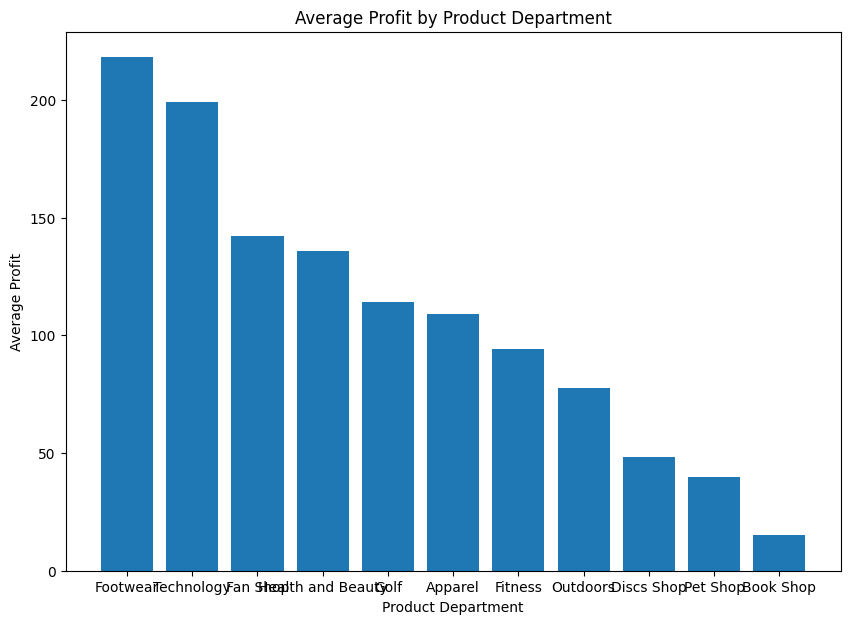

In [35]:

import matplotlib.pyplot as plt
# Calculate average profit per product department
avg_profit_by_department = df.groupby('Product Department')['Profit'].mean().sort_values(ascending=False)

# Extract product department names and average profit
department_names = avg_profit_by_department.index.to_list()
avg_profit = avg_profit_by_department.values.tolist()

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(department_names, avg_profit)
plt.title("Average Profit by Product Department")
plt.xlabel("Product Department")
plt.ylabel("Average Profit")
plt.show()


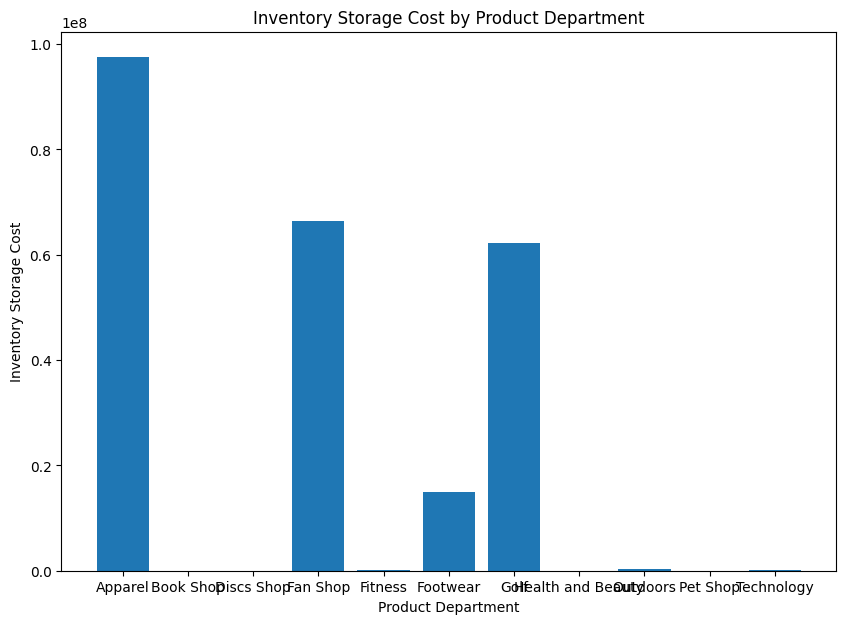

In [36]:

import matplotlib.pyplot as plt
# Calculate the inventory storage cost per product department
storage_cost_by_department = df.groupby('Product Department')['Storage_Cost'].sum()

# Extract product department names and storage cost
department_names = storage_cost_by_department.index.to_list()
storage_cost = storage_cost_by_department.values.tolist()

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(department_names, storage_cost)
plt.title("Inventory Storage Cost by Product Department")
plt.xlabel("Product Department")
plt.ylabel("Inventory Storage Cost")
plt.show()


In [37]:
# Calculate the supply chain risk assessment score
df['Supply Chain Risk Assessment'] = (df['Order Processing Time'] + df['Storage_Cost'] + df['Inventory Cost Per Unit']) / df['Profit_Margin']

# Display the supply chain risk assessment score for each product
df['Supply Chain Risk Assessment'].head()


0    0.127830
1    0.144369
2    0.108093
3    0.369390
4    6.685936
Name: Supply Chain Risk Assessment, dtype: float64

In [38]:

import numpy as np
# Import necessary libraries
from sklearn.cluster import KMeans

# Extract relevant data for clustering
data = df[['Order Processing Time', 'Storage_Cost', 'Inventory Cost Per Unit']]

# Determine the optimal number of clusters using the elbow method
inertia_scores = []
cluster_num = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    inertia_scores.append(kmeans.inertia_)
    cluster_num.append(n)

# Select the optimal number of clusters based on the elbow method
optimal_clusters = cluster_num[np.argmin(inertia_scores)]

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

# Add cluster labels to the DataFrame
df['Customer Segment'] = kmeans.labels_

# Analyze customer segments
df.groupby('Customer Segment').agg({'Order Processing Time': 'mean', 'Storage_Cost': 'mean', 'Inventory Cost Per Unit': 'mean'})


,Order Processing Time,Storage_Cost,Inventory Cost Per Unit
Customer Segment,,,
0,1.755741,1180.399819,2.193236
1,2.847509,147.768049,1.209536
2,3.983609,549.155431,1.408840
3,1.572926,1814.635635,2.003120
4,491.562967,145.666048,1.146551
5,-495.419188,142.475131,1.145064
6,3.629650,312.039287,1.418111
7,2.682289,27.974873,1.090038
8,1.989444,813.350438,1.629056


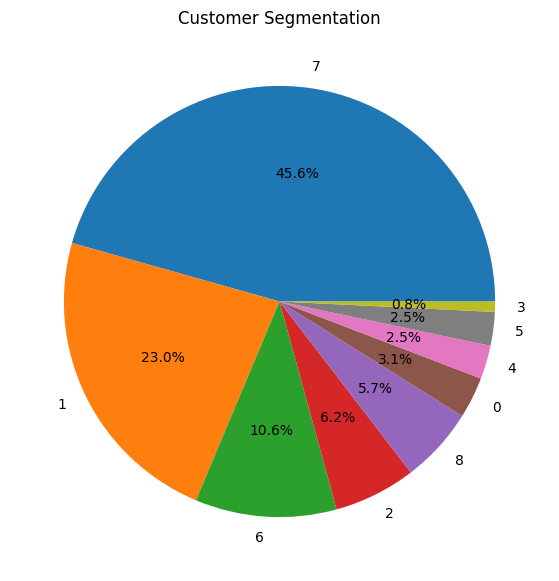

In [39]:
# prompt: plot the customer segment in pie chart

import matplotlib.pyplot as plt
# Calculate the number of customers in each segment
segment_counts = df['Customer Segment'].value_counts()

# Extract segment labels and counts
labels = segment_counts.index.to_list()
counts = segment_counts.values.tolist()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.title("Customer Segmentation")
plt.show()
